goals for the week:

Preprocessing

Bag of words

Use la méthode avec fréquence ou fréquence logarithmique

Enlever les stop words
Stemming

Dimensionality reduction

Bert: get a representation of the words, se renseigner

chose a clasifier SVM , logistic regression, fully connected neural network (1/3 layers)

reduce the size of the vocabulary removing the words that appears only once



#### 1) getting the data into dataframes

In [112]:
import pandas as pd
import glob
import numpy as np

# Allows to chose between https://github.com/vijini/GPT2_Generated-Hotel_reviews ( dataset=1 ) or https://github.com/dbuscaldi/op_spam_GPT3 (=0)
dataset=1 


In [113]:
if dataset==0:
    file_path = '/Users/Forcioli/desktop/STAGE_weeks/week_2/generated_GPT3_negative/*.txt'
    text_files = glob.glob(file_path)
    generated_negative = []
    for file in text_files:
        with open(file, 'r') as f:
            content = f.read() # 0 if truthful 1 if deceptive
            generated_negative.append([content, 1, 0,1]) # first column text 2nd generated (1 if generated 0 else) 3rd negative (0) positive (1)
    df_gn = pd.DataFrame(generated_negative, columns=['Text', 'Generated', 'Positive/Negative','Deceptive'])

    file_path = '/Users/Forcioli/desktop/STAGE_weeks/week_2/generated_GPT3_positive/*.txt'
    text_files = glob.glob(file_path)
    generated_positive = []
    for file in text_files:
        with open(file, 'r') as f:
            content = f.read()
            generated_positive.append([content, 1, 1,1]) # first column text 2nd generated (1 if generated 0 else) 3rd negative (0) positive (1)
    df_gp = pd.DataFrame(generated_positive, columns=['Text', 'Generated', 'Positive/Negative','Deceptive'])

    #file_path = '/Users/Forcioli/desktop/STAGE_weeks/week_2/not_generated/negative_polarity/deceptive_from_MTurk/*.txt'
    #text_files = glob.glob(file_path)
    #ngd_negative = []
    #for file in text_files:
    #    with open(file, 'r') as f:
    #        content = f.read()
    #        ngd_negative.append([content, 0, 0,1]) # first column text 2nd generated (1 if generated 0 else) 3rd negative (0) positive (1)
    #df_ngnd = pd.DataFrame(ngd_negative, columns=['Text', 'Generated', 'Positive/Negative','Deceptive'])

    file_path = '/Users/Forcioli/desktop/STAGE_weeks/week_2/not_generated/negative_polarity/truthful_from_Web/*.txt'
    text_files = glob.glob(file_path)
    ng_negative = []
    for file in text_files:
        with open(file, 'r') as f:
            content = f.read()
            ng_negative.append([content, 0, 0,0]) # first column text 2nd generated (1 if generated 0 else) 3rd negative (0) positive (1)
    df_ngn = pd.DataFrame(ng_negative, columns=['Text', 'Generated', 'Positive/Negative','Deceptive'])

    file_path = '/Users/Forcioli/desktop/STAGE_weeks/week_2/not_generated/positive_polarity/truthful_from_TripAdvisor/*.txt'
    text_files = glob.glob(file_path)
    ng_positive = []
    for file in text_files:
        with open(file, 'r') as f:
            content = f.read()
            ng_positive.append([content, 0, 1,0]) # first column text 2nd generated (1 if generated 0 else) 3rd negative (0) positive (1)
    df_ngp = pd.DataFrame(ng_positive, columns=['Text', 'Generated', 'Positive/Negative','Deceptive'])

    #file_path = '/Users/Forcioli/desktop/STAGE_weeks/week_2/not_generated/positive_polarity/deceptive_from_MTurk/*.txt'
    #text_files = glob.glob(file_path)
    #ngd_positive = []
    #for file in text_files:
    #    with open(file, 'r') as f:
    #        content = f.read()
    #        ngd_positive.append([content, 0, 1,1]) # first column text 2nd generated (1 if generated 0 else) 3rd negative (0) positive (1)
    #df_ngpd = pd.DataFrame(ngd_positive, columns=['Text', 'Generated', 'Positive/Negative','Deceptive'])


    #df = pd.concat([df_ngn, df_ngp, df_ngpd, df_ngnd, df_gp, df_gn], ignore_index=True)
    df = pd.concat([df_ngn, df_ngp, df_gp, df_gn], ignore_index=True)

else:
    file_path = '/Users/Forcioli/desktop/STAGE_weeks/week_2/op_spam_v1.4/negative_polarity/deceptive_from_MTurk/*.txt'
    text_files = glob.glob(file_path)
    n_d = []
    for file in text_files:
        with open(file, 'r') as f:
            content = f.read() # 0 if truthful 1 if deceptive
            n_d.append([content, 0,1]) # first column text 2nd generated (1 if generated 0 else) 3rd negative (0) positive (1)
    df_n_d = pd.DataFrame(n_d, columns=['Text', 'Positive/Negative','Deceptive'])


    file_path = '/Users/Forcioli/desktop/STAGE_weeks/week_2/op_spam_v1.4/negative_polarity/truthful_from_Web/*.txt'
    text_files = glob.glob(file_path)
    n_nd = []
    for file in text_files:
        with open(file, 'r') as f:
            content = f.read() # 0 if truthful 1 if deceptive
            n_nd.append([content, 0,0]) # first column text 2nd generated (1 if generated 0 else) 3rd negative (0) positive (1)
    df_n_nd = pd.DataFrame(n_nd, columns=['Text', 'Positive/Negative','Deceptive'])

    file_path = '/Users/Forcioli/desktop/STAGE_weeks/week_2/op_spam_v1.4/positive_polarity/deceptive_from_MTurk/*.txt'
    text_files = glob.glob(file_path)
    p_d = []
    for file in text_files:
        with open(file, 'r') as f:
            content = f.read() # 0 if truthful 1 if deceptive
            p_d.append([content, 1,1]) # first column text 2nd generated (1 if generated 0 else) 3rd negative (0) positive (1)
    df_p_d = pd.DataFrame(p_d, columns=['Text', 'Positive/Negative','Deceptive'])
                

    file_path = '/Users/Forcioli/desktop/STAGE_weeks/week_2/op_spam_v1.4/positive_polarity/truthful_from_TripAdvisor/*.txt'
    text_files = glob.glob(file_path)
    p_nd = []
    for file in text_files:
        with open(file, 'r') as f:
            content = f.read() # 0 if truthful 1 if deceptive
            p_nd.append([content, 1,0]) # first column text 2nd generated (1 if generated 0 else) 3rd negative (0) positive (1)
    df_p_nd = pd.DataFrame(p_nd, columns=['Text', 'Positive/Negative','Deceptive'])


    df = pd.concat([df_p_nd, df_p_d, df_n_d, df_n_nd], ignore_index=True)



print(f'Here is the dataset in a dataframe \n{df}')


Here is the dataset in a dataframe 
                                                   Text  Positive/Negative  \
0     The Hard Rock Hotel Chicago has become my favo...                  1   
1     My wife and I had to stay downtown for event t...                  1   
2     took a weekend trip with my wife. got a great ...                  1   
3     We stayed here because of all the great review...                  1   
4     Just returned from a week in Chicago with the ...                  1   
...                                                 ...                ...   
1595  The hotel was undergoing renovations so it was...                  0   
1596  My son & I joined my husband on a work trip. W...                  0   
1597  We experienced bed bugs in our room while stay...                  0   
1598  The room was big and luxurious, befitting the ...                  0   
1599  My two girlfriends and I arrived at the hotel,...                  0   

      Deceptive  
0        

#### 2) Stemming and Bag of words

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [115]:

# Removing "stop words" 
stop_words = [ 'a', 'an', 'and',',', '.','those','these','or','we','am','my', 'are', 'as', 'at', 'be', 'by', 'for', 'from','has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that','this', 'the', 'to', 'was', 'were', 'with']
vectorizer = CountVectorizer(stop_words=stop_words)
bow_matrix = vectorizer.fit_transform(df['Text']).toarray()

#removing the words that appear only once
feature_names = vectorizer.vocabulary_
word_frequencies = bow_matrix.sum(axis=0).ravel()
indices_to_remove = np.where(word_frequencies == 1)[0]
bow_matrix = bow_matrix[:, np.delete(np.arange(bow_matrix.shape[1]), indices_to_remove)]

tfidf_transformer = TfidfTransformer()
bow_matrix_tf = tfidf_transformer.fit_transform(bow_matrix)
matrix= bow_matrix_tf.toarray()

df_bow = df.drop('Text', axis=1)
df_bow['Text'] = [matrix[i] for i in range(len(matrix))]

print(f' New dataframe with text encoded with Bag of words : \n {df_bow}')

 New dataframe with text encoded with Bag of words : 
       Positive/Negative  Deceptive  \
0                     1          0   
1                     1          0   
2                     1          0   
3                     1          0   
4                     1          0   
...                 ...        ...   
1595                  0          0   
1596                  0          0   
1597                  0          0   
1598                  0          0   
1599                  0          0   

                                                   Text  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
...                                                 ...  
1595  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1596  [0.0, 0.0, 0.0, 0.

#### 3) PCA 

##### 3.1) Implementation of PCA

In [116]:
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

In [117]:
pca = PCA(n_components=3) 
pca_result = pca.fit_transform(matrix)
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2','PC3']) 
df_with_pca = pd.concat([df_bow, pca_df], axis=1)
print(df_with_pca)


      Positive/Negative  Deceptive  \
0                     1          0   
1                     1          0   
2                     1          0   
3                     1          0   
4                     1          0   
...                 ...        ...   
1595                  0          0   
1596                  0          0   
1597                  0          0   
1598                  0          0   
1599                  0          0   

                                                   Text       PC1       PC2  \
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.089466 -0.124378   
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.052750 -0.112737   
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.054184  0.063553   
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.078517 -0.112771   
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.009236  0.133777   
...                                                 ...       ...    

##### 3.1) Visualisation of PCA

In [118]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [119]:
if dataset==0:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    generated_data = df_with_pca[df_with_pca['Generated'] == 1]
    not_generated_data = df_with_pca[df_with_pca['Generated'] == 0]

    ax.scatter(generated_data['PC1'], generated_data['PC2'], generated_data['PC3'], c='blue', label='Generated')
    ax.scatter(not_generated_data['PC1'], not_generated_data['PC2'], not_generated_data['PC3'], c='red', label='Not Generated')

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Data in 3D plot')


    ax.legend()
    plt.show()

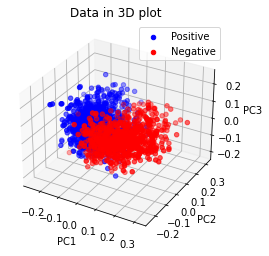

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

positive_data = df_with_pca[df_with_pca['Positive/Negative'] == 1]
negative_data = df_with_pca[df_with_pca['Positive/Negative'] == 0]

ax.scatter(positive_data['PC1'], positive_data['PC2'], positive_data['PC3'], c='blue', label='Positive')
ax.scatter(negative_data['PC1'], negative_data['PC2'], negative_data['PC3'], c='red', label='Negative')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Data in 3D plot')


ax.legend()
plt.show()

##### 3.3) Splitting the dataset with PCA

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_pca = df_with_pca[['PC1','PC2','PC3']].copy()
if dataset==0:  
    Y_generated=df_with_pca[['Generated']].copy()
Y_pn=df_with_pca[['Positive/Negative']].copy()
Y_d=df_with_pca[['Deceptive']].copy()


##### 3.4) SVM Classifier 

In [123]:
from sklearn import svm
from sklearn.metrics import accuracy_score

Predicting first Generated or not

In [124]:
if dataset==0:
    X_train, X_test, y_train, y_test = train_test_split(X_pca, Y_generated, test_size=0.2, random_state=42)
    classifier = svm.SVC()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for Generated or not: {accuracy}")


Predicting Positive or Not

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y_pn, test_size=0.2, random_state=42)
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Positive or not: {accuracy}")



Accuracy for Positive or not: 0.890625


/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting deceptive or not

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y_d, test_size=0.2, random_state=42)
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for deceptive or not: {accuracy}")



/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for deceptive or not: 0.7375


##### 3.5) Neural network 

Can not install tensorflow

In [127]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense


In [128]:

#model = Sequential()
#model.add(Dense(units=hidden_units, activation='relu', input_shape=(3,)))
#model.add(Dense(units=hidden_units, activation='relu'))
#model.add(Dense(units=hidden_units, activation='relu'))



##### 3.6) Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression


In [130]:
if dataset==0:
    X_train, X_test, y_train, y_test = train_test_split(X_pca, Y_generated, test_size=0.2, random_state=42)
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for Generated or not: {accuracy}")


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y_pn, test_size=0.2, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Positive or not: {accuracy}")

Accuracy for Positive or not: 0.8625


/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y_d, test_size=0.2, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for deceptive or not: {accuracy}")

Accuracy for deceptive or not: 0.721875


/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Not as good as SVM

#### 4) Without PCA 

##### 4.1) Feature selection

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [134]:
selector = SelectKBest(score_func=chi2, k=1000)


In [135]:
if dataset==0:
    Y_pn=df_bow[['Positive/Negative']].copy()
    Y_d=df_bow[['Deceptive']].copy()
    Y_g=df_bow[['Generated']].copy()
else:
    Y_pn=df_bow[['Positive/Negative']].copy()
    Y_d=df_bow[['Deceptive']].copy()

X_new_pn = selector.fit_transform(matrix, Y_pn)
selected_feature_indices_pn = selector.get_support(indices=True)
feature_list_pn=list(feature_names.keys())
selected_features_pn = np.array(feature_list_pn)[selected_feature_indices_pn]

X_new_d = selector.fit_transform(matrix, Y_d)
selected_feature_indices_d = selector.get_support(indices=True)
feature_list_d=list(feature_names.keys())
selected_features_d = np.array(feature_list_d)[selected_feature_indices_d]

if dataset==0:
    X_new_g = selector.fit_transform(matrix, Y_g)
    selected_feature_indices_g = selector.get_support(indices=True)
    feature_list_g=list(feature_names.keys())
    selected_features_g = np.array(feature_list_g)[selected_feature_indices_g]
    print(f'Selected features for Generated \n {selected_features_g[:10]}')


print(f'Selected features for Positive or negative: \n {selected_features_pn[:10]}')
print(f'Selected features for deceptive: \n {selected_features_d[:10]}')


Selected features for Positive or negative: 
 ['might' 'each' 'murals' 'cool' 'always' 'view' 'screen' 'return' 'event'
 'bit']
Selected features for deceptive: 
 ['hard' 'favorite' 'stayed' 'times' 'have' 'had' 'other' 'than'
 'experience' 'you']


In [136]:
if dataset==0:
    X_train, X_test, y_train, y_test = train_test_split(X_new_g, Y_g, test_size=0.2, random_state=42)
    classifier = svm.SVC()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for Generated or not: {accuracy}")

X_train, X_test, y_train, y_test = train_test_split(X_new_pn, Y_pn, test_size=0.2, random_state=42)
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Positive or not: {accuracy}")

X_train, X_test, y_train, y_test = train_test_split(X_new_d, Y_d, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for deceptive or not: {accuracy}")

/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Positive or not: 0.9625
Accuracy for deceptive or not: 0.90625


/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

if dataset==0:
    kf = KFold(n_splits=7, shuffle=True)  
    model = svm.SVC()  
    scores = []  

    for train_index, val_index in kf.split(X_new_g):
        X_train, X_val = X_new_g[train_index], X_new_g[val_index] 
        y_train, y_val = Y_g.values[train_index], Y_g.values[val_index]  
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_val) 
        score = accuracy_score(y_val, y_pred)  
        scores.append(score) 
    average_score = sum(scores) / 7
    print("Average accuracy for Generated or not:", average_score)

kf = KFold(n_splits=7, shuffle=True)  
model = svm.SVC()  
scores = []  

for train_index, val_index in kf.split(X_new_d):
    X_train, X_val = X_new_d[train_index], X_new_d[val_index] 
    y_train, y_val = Y_d.values[train_index], Y_d.values[val_index]  
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_val) 
    score = accuracy_score(y_val, y_pred)  
    scores.append(score) 
average_score = sum(scores) / 7
print("Average accuracy for Deceptive or not:", average_score)

kf = KFold(n_splits=7, shuffle=True)  
model = svm.SVC()  
scores = []  

for train_index, val_index in kf.split(X_new_pn):
    X_train, X_val = X_new_pn[train_index], X_new_pn[val_index] 
    y_train, y_val = Y_pn.values[train_index], Y_pn.values[val_index]  
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_val) 
    score = accuracy_score(y_val, y_pred)  
    scores.append(score) 
average_score = sum(scores) / 7
print("Average accuracy for Positive or not:", average_score)



/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d arr

Average accuracy for Deceptive or not: 0.9193808757702117


/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Forcioli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d arr

Average accuracy for Positive or not: 0.9625045145615129


In [138]:
if dataset==1:
    len_n= 800
    len_p= 800
    len_d=800
    len_nd=800

if dataset==0:
    len_n= 1200
    len_p= 1200
    len_d=800
    len_nd=800
    len_ng= 1600
    len_g=800


if dataset==0:
    freq_generated={f:0 for f in selected_features_g}
    freq_ngenerated={f:0 for f in selected_features_g}
    for word,g in zip(df_bow['Text'],df_bow['Generated']):
        for i in selected_feature_indices_g:
            if word[i]!=0:
                if g==1:
                    freq_generated[feature_list_g[i]]+=word[i]
                else: 
                    freq_ngenerated[feature_list_g[i]]+=word[i]
    freq_generated={n:freq_generated[n]/len_g for n in freq_generated}
    freq_ngenerated={n:freq_ngenerated[n]/len_ng for n in freq_ngenerated}


freq_deceptive={f:0 for f in selected_features_d}
freq_ndeceptive={f:0 for f in selected_features_d}
for word,g in zip(df_bow['Text'],df_bow['Deceptive']):
    for i in selected_feature_indices_d:
        if word[i]!=0:
            if g==1:
                freq_deceptive[feature_list_d[i]]+=word[i]
            else: 
                freq_ndeceptive[feature_list_d[i]]+=word[i]
                
freq_deceptive={n:freq_deceptive[n]/len_d for n in freq_deceptive}
freq_ndeceptive={n:freq_ndeceptive[n]/len_nd for n in freq_ndeceptive}

freq_positive={f:0 for f in selected_features_pn}
freq_negative={f:0 for f in selected_features_pn}
for word,g in zip(df_bow['Text'],df_bow['Positive/Negative']):
    for i in selected_feature_indices_pn:
        if word[i]!=0:
            if g==1:
                freq_positive[feature_list_pn[i]]+=word[i]
            else: 
                freq_negative[feature_list_pn[i]]+=word[i]
freq_positive={n:freq_positive[n]/len_p for n in freq_positive}
freq_negative={n:freq_negative[n]/len_n for n in freq_negative}

    

                

In [139]:

ordered=0


if dataset==0:
    if ordered==1:
        freq_generated=dict(sorted(freq_generated.items(), key= lambda item: item[1],reverse=True))
        freq_ngenerated=dict(sorted(freq_ngenerated.items(), key= lambda item: item[1], reverse=True))
    print(f' FREQUENCE OF THE MOST RELEVANT WORDS FOR GENERATED OR NOT IN GENERATED TEXTS {freq_generated}')
    print(f' FREQUENCE OF THE MOST RELEVANT WORDS FOR GENERATED OR NOT IN THE HUMAN TEXT {freq_ngenerated}')

if ordered==1:
    freq_positive=dict(sorted(freq_positive.items(), key= lambda item: item[1],reverse=True))
    freq_negative=dict(sorted(freq_negative.items(), key= lambda item: item[1], reverse=True))

    freq_deceptive=dict(sorted(freq_deceptive.items(), key= lambda item: item[1],reverse=True))
    freq_ndeceptive=dict(sorted(freq_ndeceptive.items(), key= lambda item: item[1], reverse=True))


print(f' FREQUENCE OF THE MOST RELEVANT WORDS FOR POSITIVE OR NEGATIVE IN POSITIVE TEXTS {freq_positive}')
print(f' FREQUENCE OF THE MOST RELEVANT WORDS FOR POSITIVE OR NEGATIVE IN NEGATIVE TEXTS {freq_negative}')

print(f' FREQUENCE OF THE MOST RELEVANT WORDS FOR DECEPTIVE OR NOT IN DECEPTIVE TEXTS {freq_deceptive}')
print(f' FREQUENCE OF THE MOST RELEVANT WORDS FOR DECEPTIVE OR NOT IN TRUTHFUL TEXTS {freq_ndeceptive}')


 FREQUENCE OF THE MOST RELEVANT WORDS FOR POSITIVE OR NEGATIVE IN POSITIVE TEXTS {'might': 0.0014400147687945724, 'each': 0.0, 'murals': 0.001778100378641111, 'cool': 0.0004976318610547694, 'always': 0.0018280102301322077, 'view': 0.0, 'screen': 0.0, 'return': 0.0013699024746665217, 'event': 0.013134418098070881, 'bit': 0.008112829906444243, 'instead': 0.00698000968750103, 'renovations': 0.0033039328918971324, 'job': 0.00188182611724325, 'when': 0.00020715532485427124, 'any': 0.0, 'more': 0.00012981913383478178, 'location': 0.0, 'albeit': 0.0015707267267407634, 'every': 0.0018835445978788823, 'expect': 0.0002594418729068198, 'tastefully': 0.002580798172985712, 'asian': 0.002790085172631671, 'four': 0.000574909069265746, 'cramped': 0.0024528210366048264, 'friendly': 0.00037342247587051925, 'beat': 0.0, 'current': 0.010457468018341166, 'watch': 0.000178277882311179, 'suggested': 0.0, 'because': 0.0, 'impressed': 0.0023443714562904326, 'five': 0.0, 'hilton': 0.0030511375909946063, 'far': 

##### 4.1) BERT


BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained model developed by Google AI's researchers. It is a state-of-the-art language representation model based on the Transformer architecture. BERT is designed to understand and generate natural language text by learning the contextual relationships between words in a bidirectional manner.

Unlike traditional language models that process text in a left-to-right or right-to-left manner, BERT employs a bidirectional training approach. It learns to predict missing words by considering the surrounding context from both directions, allowing it to capture a deeper understanding of the relationships between words.

BERT has been pre-trained on a large corpus of diverse text, such as Wikipedia articles, books, and web pages. During pre-training, it learns to create word embeddings that represent the meanings of words and their contextual dependencies. These pre-trained embeddings can then be fine-tuned on specific downstream NLP tasks, such as text classification, named entity recognition, question answering, and more.

By leveraging BERT's contextual language understanding, NLP models can benefit from its ability to handle tasks requiring an understanding of the context and meaning of words in a given text. BERT has significantly advanced the performance on a wide range of NLP tasks and has become a popular tool in natural language processing research and applications.

In [140]:
from transformers import AutoModel, AutoTokenizer

In [141]:
from transformers import BertTokenizer, BertModel
import torch

In [142]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased"  )


ImportError: 
BertModel requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFBertModel".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.
